# make all word list & random select

In [9]:
import random, json
import pandas as pd
import numpy as np
with open('js/words.js') as f:
    next(f)
    dic = json.load(f)

In [37]:
all_item = []
for genre, words in dic.items():
    for word in words:
        all_item.append([genre, word])
print(len(all_item))

allword = [x[1] for x in all_item]
allword_set = set(allword)
for w in allword:
    if allword.count(w) > 1:
            print(w)

560


# rewrite

In [33]:
for v in dic.values():
    v.sort()

In [34]:
with open('words.js', 'w') as f:
    f.write("const word_dic = \n")
    json.dump(dic, f, indent=4, ensure_ascii=False)

# Beatles
create lyrics

In [56]:
text = """
(One, two, three)

I know it's true
It's all because of you
And, if I make it through
It's all because of you

And, now and then
If we must start again
Well, we will know for sure
That I will love you

Now and then
I miss you
Oh, now and then
I want you to be there for me
Always to return to me

I know it's true
It's all because of you
And, if you go away
I know you'll never stay

Now and then
I miss you
Oh, now and then
I want you to be there for me

(Ahh)
(Ahh)
(Ahh)
(Ooh)
(Ahh)

I know it's true
It's all because of you
And, if I make it through
It's all because of you
"""

text.replace('\n','<br>')

"<br>(One, two, three)<br><br>I know it's true<br>It's all because of you<br>And, if I make it through<br>It's all because of you<br><br>And, now and then<br>If we must start again<br>Well, we will know for sure<br>That I will love you<br><br>Now and then<br>I miss you<br>Oh, now and then<br>I want you to be there for me<br>Always to return to me<br><br>I know it's true<br>It's all because of you<br>And, if you go away<br>I know you'll never stay<br><br>Now and then<br>I miss you<br>Oh, now and then<br>I want you to be there for me<br><br>(Ahh)<br>(Ahh)<br>(Ahh)<br>(Ooh)<br>(Ahh)<br><br>I know it's true<br>It's all because of you<br>And, if I make it through<br>It's all because of you<br>"

## create `beatles.js`

In [6]:
import pandas as pd
import json, os, glob, re
df = pd.read_csv('beatles.csv')
df.fillna("", inplace=True)
df = df[['song','album','year','bpm','vocal','harmony','database_url','harmony_youtube','instruments','instrumental_youtube','spotify','lyrics']]
df

,song,album,year,bpm,vocal,harmony,database_url,harmony_youtube,instruments,instrumental_youtube,spotify,lyrics
0,I Saw Her Standing There,Please Please Me,1962,160.0,Paul,John,https://beatlesdata.info/1/01_isawherstandingt...,cj1z69kCHNY,325・Duo Jet・ヘフナー,VNchFGmF-jI,3KiexfmhxHvG5IgAElmTkd,"(1,2,3,4!)<br><br>Well, she was just seventeen..."
1,Misery,Please Please Me,1963,134.0,Paul・John,,https://beatlesdata.info/1/02_misery.html,,J-160E・Duo Jet・ヘフナー・ピアノ,UX1v-XisfkY,40qXGg5nRbcWzcFb26KWkQ,The world is treating me bad... Misery<br><br>...
2,Anna (Go To Him),Please Please Me,1963,109.0,John,Paul・George,https://beatlesdata.info/1/03_anna.html,lVoV_eX8OnQ,J-160E・Duo Jet・ヘフナー,7-51b5RXCo8,2baEFuU0gQon0hgVRioI1o,"Anna<br>You come and ask me, girl<br>To set yo..."
3,Chains,Please Please Me,1963,130.0,George,Paul・John,https://beatlesdata.info/1/04_chains.html,bdRTlePJ0lI,325・Duo Jet・ヘフナー・ハーモニカ,DVhatLAd0Tg,3JQWLa88R35d971o5bIImd,"Chains, my baby's got me locked up in chains<b..."
4,Boys,Please Please Me,1963,145.0,Ringo,John・Paul・George,https://beatlesdata.info/1/05_boys.html,yPrlkxc31aU,325・Duo Jet・ヘフナー,fXBI2gZHL-4,7JxGM1R32ZqfwZou3VtnTg,I been told when a boy kiss a girl<br>Take a t...
...,...,...,...,...,...,...,...,...,...,...,...,...
211,Old Brown Shoe,Past Masters,1969,143.0,George,John・Paul,https://beatlesdata.info/16/12_oldbrownshoe.html,,,nWLIuIm2QnY,7vMCInGW1N1uTFC1LoklEM,I want a love that's right but right is only h...
212,You Know My Name (Look Up The Number),Past Masters,1970,0.0,John・Paul,,https://beatlesdata.info/16/15_youknowmayname....,,,,2k7gS1tS9OHeS3e8MatzgJ,You know my name<br>Look up the number<br>You ...
213,Free As A Bird,Anthology 1,1995,,John,Paul・George・Ringo,No data,,,,6hLY3Tz1Xt5kBuKNDTs4ib,Free as a bird<br>It's the next best thing to ...
214,Real Love,Anthology 2,1996,,John,Paul・George・Ringo,No data,,,,5frMgt4jqRGJk3yMKfqOyl,All my little plans and schemes<br>Lost like s...


In [9]:
with open("js/beatles.js", "w") as f:
    ### SONGDATA
    f.write("const SONGDATA = {\n")
    for i, row in df.iterrows():
        data = [row[col] for col in row.drop("song").index]
        f.write(f"\t{json.dumps(row['song'])}: {data},\n")
    f.write("}\n\n")

    ### PDFs
    files = glob.glob('music/scores/*')
    files = sorted([f.split('/')[-1].split('.pdf')[0] for f in files])
    f.write("const PDFs = [\n")
    for file in files:
        f.write(f"\t{json.dumps(file)},\n")
    f.write("]\n\n")

    ### SONGNAMES
    f.write("const SONGNAMES = [\n")
    for song in df["song"]:
        f.write(f"\t{json.dumps(song)},\n")
    f.write("]")

# others

In [27]:
for s in df[df.album.str.startswith('Past')].reset_index().song.to_list():
    text = f"""<li class="notplayed" onclick="make_data('{s}')">{s}</li>"""
    print(text)

<li class="notplayed" onclick="make_data('From Me To You')">From Me To You</li>
<li class="notplayed" onclick="make_data('Thank You Girl')">Thank You Girl</li>
<li class="notplayed" onclick="make_data('She Loves You')">She Loves You</li>
<li class="notplayed" onclick="make_data('I'll Get You')">I'll Get You</li>
<li class="notplayed" onclick="make_data('I Want To Hold Your Hand')">I Want To Hold Your Hand</li>
<li class="notplayed" onclick="make_data('This Boy')">This Boy</li>
<li class="notplayed" onclick="make_data('Komm, Gib Mir Deine Hand')">Komm, Gib Mir Deine Hand</li>
<li class="notplayed" onclick="make_data('Sie Liebt Dich')">Sie Liebt Dich</li>
<li class="notplayed" onclick="make_data('Long Tall Sally')">Long Tall Sally</li>
<li class="notplayed" onclick="make_data('I Call Your Name')">I Call Your Name</li>
<li class="notplayed" onclick="make_data('Slow Down')">Slow Down</li>
<li class="notplayed" onclick="make_data('Matchbox')">Matchbox</li>
<li class="notplayed" onclick="mak

In [4]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np

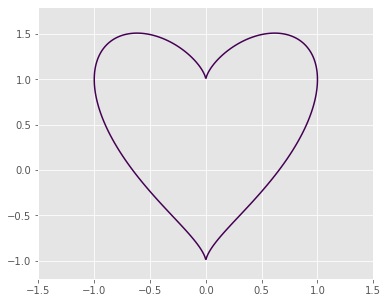

In [17]:
import matplotlib.pyplot as plt
import numpy as np

delta = 0.001
xrange = np.arange(delta, 2, delta)
yrange = np.arange(-1.5, 2, delta)
X, Y = np.meshgrid(xrange,yrange)
Z = X**2 + (Y-X**(2/3))**2 - 1
plt.figure(figsize=(6,5))
plt.contour(X, Y, Z, [0])
plt.contour(-X, Y, Z, [0])
plt.xlim([-1.5, 1.5])
plt.ylim([-1.2, 1.8])
plt.show()

In [29]:
import requests
from bs4 import BeautifulSoup

r = requests.get("https://search.travel.rakuten.co.jp/ds/undated/search?f_dai=japan&f_chu=hokkaido&f_shou=&f_sai=&f_cd=02&f_ptn=tiku&f_latitude=0&f_longitude=0&f_layout=&f_sort=hotel&f_rm_equip=&f_page=1&f_hyoji=30&f_image=1&f_tab=hotel&f_setubi=&f_snow_code=&f_cok=&f_ido=&f_kdo=&f_km=&f_teikei=&f_campaign=&f_disp_type=&f_kin=&f_kin2=&f_landmark_id=&f_squeezes=roten")
c = r.content

soup = BeautifulSoup(c, "html.parser")

hotels = soup.select("#htlBox > li")

all_data = []
for hotel in hotels:
    data = {
        "施設名": hotel.select_one("div.info").text.strip(),
        "住所": hotel.select_one("p.htlAccess").text.strip(),
        "説明": hotel.select_one("p.htlSpecial").text.strip(),
        "価格": hotel.select_one("p.htlPrice").text.strip(),
        "画像": hotel.select_one("img").get("src").split("?")[0]
    }
    all_data.append(data)

In [30]:
all_data[0]

{'施設名': '函館・湯の川・大沼・奥尻\n東急ステイ函館朝市\u3000灯の湯（あかりのゆ）\nこちらの宿泊施設は、宿泊者からの総合評価点数が高い、もしくは多くの宿泊実績がある等の独自の条件を満たしたプリファードプログラム参加施設です。楽天トラベルへサービス利用料を支払うことにより、原則同条件の他の施設よりも上位に表示されています。（ヘルプページ参照）\n\n\r\n    \t\t[最安料金]\r\n\t\t\t3,846円〜（消費税込4,230円〜）\n\n\n\n4.40\r\n\t\t\t\r\n\t\t\t[お客さまの声（256件）]\r\n\t\t\n\n最上階に露天風呂付天然温泉大浴場を完備！ご朝食は函館朝市提携13店舗からご朝食をチョイス！全客室に洗濯乾燥機を完備！',
 '住所': '〒040-0064\u3000北海道函館市大手町22-1-1[地図を見る]',
 '説明': '最上階に露天風呂付天然温泉大浴場を完備！ご朝食は函館朝市提携13店舗からご朝食をチョイス！全客室に洗濯乾燥機を完備！',
 '価格': '[最安料金]\r\n\t\t\t3,846円〜（消費税込4,230円〜）',
 '画像': 'https://trvimg.r10s.jp/share/image_up/179583/origin/a56a30d01372bd9102fe0979bc8540a91bbe86f4.47.9.26.3.jpg'}

In [47]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

y = ["A"]*300 + ["B"]*200 + ["C"]*100
df = pd.DataFrame({"x":range(600), "y":y})

skf = StratifiedKFold(n_splits=3)

for cv_i, (train_index, dev_index) in enumerate(skf.split(df[["x"]], df.y)):
    print(f"{cv_i+1}th fold")
    print(df.loc[dev_index, "y"].value_counts(), "\n")

1th fold
A    100
B     67
C     33
Name: y, dtype: int64 

2th fold
A    100
B     67
C     33
Name: y, dtype: int64 

3th fold
A    100
B     66
C     34
Name: y, dtype: int64 



In [57]:
for i in range(3):
    print(f"{i+1}回目です")
    print(2*i+ 3)

1回目です
3
2回目です
5
3回目です
7


In [59]:
word='python '
n=len(word)
print(n)

7


In [60]:
print(type(word))
print(type(n))
print(type(len))
print(type(print))

<class 'str'>
<class 'int'>
<class 'builtin_function_or_method'>
<class 'builtin_function_or_method'>


In [66]:
df = pd.DataFrame({
    "label1":["a","c","e"],
    "col1":[1,5,3],
    "col2":[2,0,3],
    "label2":["b","d","f"]})

def get_label(row):
    if row["col1"] > row["col2"]:
        return row["label1"]
    elif row["col1"] < row["col2"]:
        return row["label2"]
    else:
        return None

df.apply(get_label, axis=1)

0       b
1       c
2    None
dtype: object

In [68]:
df = pd.DataFrame({
    "label1":["a","c","e"],
    "col1":[1,5,3],
    "col2":[2,0,3],
    "label2":["b","d","f"]})

result = []
for i, row in df.iterrows():
    if row["col1"] > row["col2"]:
        result.append(row["label1"])
    elif row["col1"] < row["col2"]:
        result.append(row["label2"])

result

['b', 'c']

In [85]:
import sympy as sym

In [86]:
x = sym.Symbol("x")

In [87]:
f = x**2 + 3*x + 5

In [91]:
n = int(input("0-99の数字を入力: "))
evens = []
odds = []
for i in range(n+1):
    if i % 2 == 0:
        evens.append(i)
    else:
        odds.append(i)

print("偶数")
print(*evens)
print("奇数")
print(*odds)

偶数
0 2 4 6 8 10 12 14 16
奇数
1 3 5 7 9 11 13 15


In [94]:
total = 0
i = 0
while total <= 2000:
    i += 1
    total += 7*i
print(f"n = {i}")
print(f"sum: {total}")

n = 24
sum: 2100


In [92]:
total = 0
for i in range(1,1000):
    total += 7*i
    if total > 2000:
        break
print(f"n = {i}")
print(f"sum: {total}")


n = 24
sum: 2100


In [96]:
for i in range(1, 100):
    total = int(7/2 * i * (i+1))
    if total > 2000:
        break
print(f"n = {i}")
print(f"sum: {total}")

n = 24
sum: 2100


In [110]:
x

with open("data.txt", "w") as f:
    for x, y in zip(xs, ys):
        f.write(f"{x},{y}\n")


In [112]:
import pandas as pd

xs = [1,2,3,4,5,6]
ys = [3,5,7,9,11,13]

df = pd.DataFrame({"x":xs, "y":ys})
df

,x,y
0,1,3
1,2,5
2,3,7
3,4,9
4,5,11
5,6,13


In [150]:
def is_prime(n):
    for i in range(2, int(n**0.5)+1):
        if n % i == 0:
            return False
    return True

def get_prime(n):
    primes = []
    for i in range(2, int(n**0.5)+1):
        if is_prime(i) and (n % i == 0):
            primes.append(i)
    return primes 

In [160]:
def get_prime_fast(n):
    i = 2
    primes = []
    while i <= n:
        if n % i == 0:
            primes.append(i)
            n = n//i
        else:
            i += 1
    return primes

In [161]:
get_prime_fast(600851475143)

[71, 839, 1471, 6857]

In [165]:
def aaa1():
    def myfunc(a, b):
        return a+b
    print(myfunc("hoge", "fuge"))
    list=["hoge", "fuge"]
    vfunc=np.vectorize(myfunc)
    #print(myfunc(list,"Hoge"))
    vv=vfunc(list,"Hoge") #error:invalid syntax
    print(vv)
    
aaa1()

hogefuge
['hogeHoge' 'fugeHoge']


In [4]:
import MeCab

## instantiate tokenizer
tokenizer = MeCab.Tagger("-Owakati")

## tokenize sentence
text = "私の学校は、東京の中央区にあります"
tokens = tokenizer.parse(text)

## return is string of tokens with whitespaces
tokens


'私 の 学校 は 、 東京 の 中央 区 に あり ます \n'

In [6]:
## tokenization and tagging
tagger = MeCab.Tagger()

text = "私の学校は、東京の中央区にあります"
tokens = tagger.parse(text)

## return is string of tokens with tags
print(tokens)

私	名詞,代名詞,一般,*,*,*,私,ワタシ,ワタシ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
学校	名詞,一般,*,*,*,*,学校,ガッコウ,ガッコー
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
、	記号,読点,*,*,*,*,、,、,、
東京	名詞,固有名詞,地域,一般,*,*,東京,トウキョウ,トーキョー
の	助詞,連体化,*,*,*,*,の,ノ,ノ
中央	名詞,固有名詞,地域,一般,*,*,中央,チュウオウ,チューオー
区	名詞,接尾,地域,*,*,*,区,ク,ク
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
あり	動詞,自立,*,*,五段・ラ行,連用形,ある,アリ,アリ
ます	助動詞,*,*,*,特殊・マス,基本形,ます,マス,マス
EOS



In [7]:
import re
token_list = [re.split(r"[\t,]", token) for token in tokens.split('\n')[:-1]]
token_list

[['私', '名詞', '代名詞', '一般', '*', '*', '*', '私', 'ワタシ', 'ワタシ'],
 ['の', '助詞', '連体化', '*', '*', '*', '*', 'の', 'ノ', 'ノ'],
 ['学校', '名詞', '一般', '*', '*', '*', '*', '学校', 'ガッコウ', 'ガッコー'],
 ['は', '助詞', '係助詞', '*', '*', '*', '*', 'は', 'ハ', 'ワ'],
 ['、', '記号', '読点', '*', '*', '*', '*', '、', '、', '、'],
 ['東京', '名詞', '固有名詞', '地域', '一般', '*', '*', '東京', 'トウキョウ', 'トーキョー'],
 ['の', '助詞', '連体化', '*', '*', '*', '*', 'の', 'ノ', 'ノ'],
 ['中央', '名詞', '固有名詞', '地域', '一般', '*', '*', '中央', 'チュウオウ', 'チューオー'],
 ['区', '名詞', '接尾', '地域', '*', '*', '*', '区', 'ク', 'ク'],
 ['に', '助詞', '格助詞', '一般', '*', '*', '*', 'に', 'ニ', 'ニ'],
 ['あり', '動詞', '自立', '*', '*', '五段・ラ行', '連用形', 'ある', 'アリ', 'アリ'],
 ['ます', '助動詞', '*', '*', '*', '特殊・マス', '基本形', 'ます', 'マス', 'マス'],
 ['EOS']]

In [8]:
tokens

'私\t名詞,代名詞,一般,*,*,*,私,ワタシ,ワタシ\nの\t助詞,連体化,*,*,*,*,の,ノ,ノ\n学校\t名詞,一般,*,*,*,*,学校,ガッコウ,ガッコー\nは\t助詞,係助詞,*,*,*,*,は,ハ,ワ\n、\t記号,読点,*,*,*,*,、,、,、\n東京\t名詞,固有名詞,地域,一般,*,*,東京,トウキョウ,トーキョー\nの\t助詞,連体化,*,*,*,*,の,ノ,ノ\n中央\t名詞,固有名詞,地域,一般,*,*,中央,チュウオウ,チューオー\n区\t名詞,接尾,地域,*,*,*,区,ク,ク\nに\t助詞,格助詞,一般,*,*,*,に,ニ,ニ\nあり\t動詞,自立,*,*,五段・ラ行,連用形,ある,アリ,アリ\nます\t助動詞,*,*,*,特殊・マス,基本形,ます,マス,マス\nEOS\n'

In [14]:
with open("1000-most-common-words.txt", 'r') as f: 
    data = f.read().splitlines()

In [3]:
for i in range(1,11):
    print(f"{i}ターン目で逃げない :", (3/8)**i*100)

1ターン目で逃げない : 37.5
2ターン目で逃げない : 14.0625
3ターン目で逃げない : 5.2734375
4ターン目で逃げない : 1.9775390625
5ターン目で逃げない : 0.7415771484375
6ターン目で逃げない : 0.2780914306640625
7ターン目で逃げない : 0.10428428649902344
8ターン目で逃げない : 0.03910660743713379
9ターン目で逃げない : 0.014664977788925171
10ターン目で逃げない : 0.005499366670846939


In [16]:
words

['beauty', 'quiet']